# Parameterinferenz und Modellvergleich mit Bayes-Statistik
## Exercise Sheet 1
### Prof. Dr. Felix Kahlhöfer – Winter semester 2024/2025
#### Jasin Mustafi (2474075), Hatem Alnasri (xxxxxx)
1a):
- $e^{-t_1/\tau}-e^{-t_2/\tau}$
- $1 - e^{-T/\tau}$

1b) see bottom

# Sampling of random variables

The PDF of an exponential distribution is 
$$f(t;\tau) = \frac{1}{\tau}\,e^{-t/\tau}$$
for $t\geq 0$ with the expectation value $\langle t \rangle$: 
$$\langle t \rangle = \frac{1}{\tau} \int_0^\infty dt \; t \, e^{-t\tau} = \tau$$
and the standart deviation $\sigma_t$:
$$\sigma_t = \sqrt{\langle t^2 \rangle - \langle t \rangle^2} = \tau\;$$
and the CDF $F(t;\tau)$:
$$F(t;\tau) = \int_0^t dt' f(t',\tau) = 1 - e^{-t/\tau}$$
and the inverse $F^{-1}(x;\tau)$:
$$F^{-1}(x;\tau) = \tau \, \ln{\frac{1}{1-x}}.$$
Starting from a uniformly distributed random variable $f(x) = 1$, one can generate a sample of $t$ by:
$$f(t)\,dt \stackrel{!}{=} f(x)\,dx = dx$$
$$\Rightarrow \int_{0}^{t(x)}\,dt'\,f(t') = x$$
$$\Rightarrow F(t(x)) = x$$
$$\Rightarrow t(x) = F^{-1}(x)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
tau = 10**3 # let tau be 10^3

def sample_t(n,s):
    """Function to generate a sample of t
    n: length of t
    s: seed for random number generator
    """
    np.random.seed(s)
    x = np.random.rand(n) # generate n uniformly distributed random numbers between 0 and 1
    t = tau * np.log(1/(1-x)) # generate the random variable t following the exponential distribution
    return t

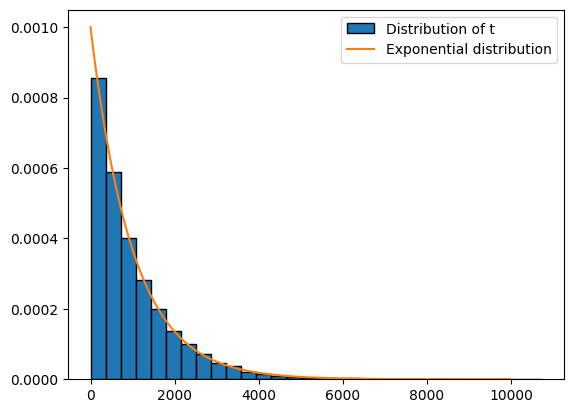

In [3]:
_ = plt.hist(sample_t(10000,0), bins=30, ec='black', density=True, label='Distribution of t')
plt.plot(np.linspace(0, 10000, 10000), 1/tau * np.exp(-np.linspace(0, 10000, 10000)/tau), label='Exponential distribution')
plt.legend()


# Parameter Estimation

In [4]:
def gaussian(x,m,s):
    return 1/np.sqrt(2*np.pi*s**2) * np.exp(-((x-m)**2)/(2*s**2))

Estimate for mean value of t: 999.61


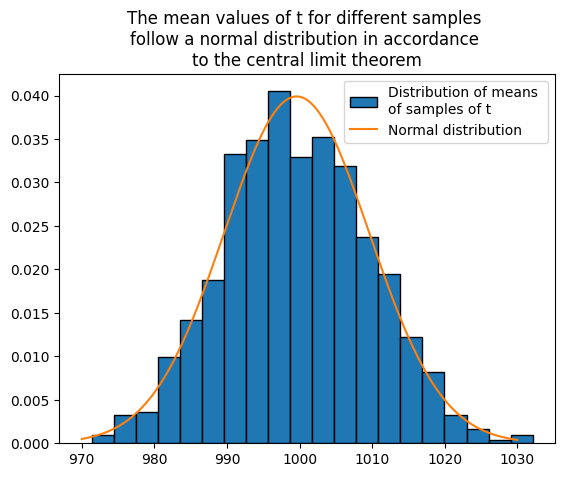

In [ ]:
t_means = []
for i in range(1000):
    t_means = np.append(t_means, np.mean(sample_t(10000,i))) # calculate mean values of t for different samples
 
est_mean = np.mean(t_means) 
print(f'Estimate for mean value of t: {est_mean:.2f}')
_ = plt.hist(t_means, bins=20, ec='black', density=True, label='Distribution of means \nof samples of t')
plt.plot(np.linspace(970,1030,1000), gaussian(np.linspace(970,1030,1000),est_mean,np.sqrt(100)), label='Normal distribution')  
plt.title('The mean values of t for different samples \nfollow a normal distribution in accordance \nto the central limit theorem')
_ = plt.legend()

# Monte Carlo Integration

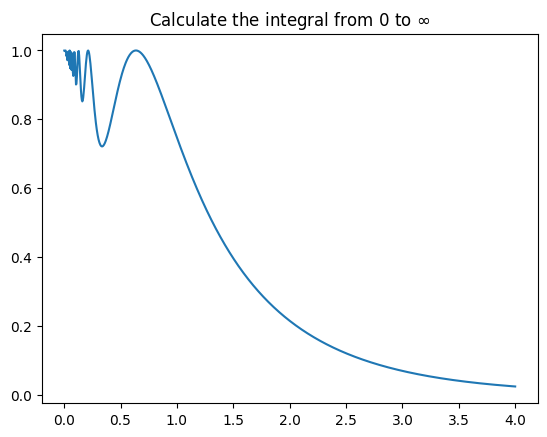

In [6]:
x = np.linspace(0.001,4,1000)
integrand = np.exp(-x*np.cos(1/x)**2)
plt.plot(x, integrand)
_ = plt.title('Calculate the integral from 0 to $\infty$')

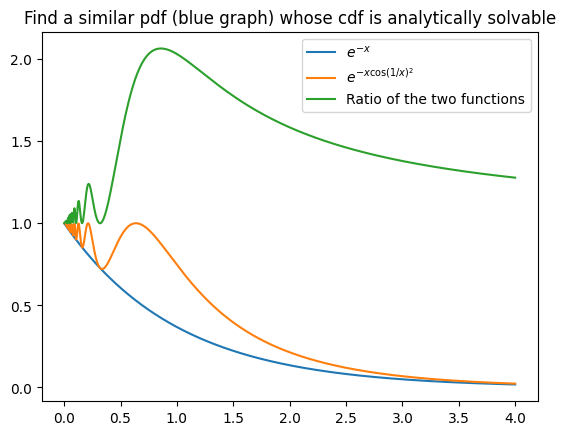

In [12]:
pdf = np.exp(-x)
plt.plot(x, pdf, label='$e^{-x}$')
plt.plot(x, integrand, label='$e^{-x\cos(1/x)^2}$')
plt.plot(x, integrand/pdf, label='Ratio of the two functions')
_ = plt.title('Find a similar pdf (blue graph) whose cdf is analytically solvable')
_ = plt.legend()

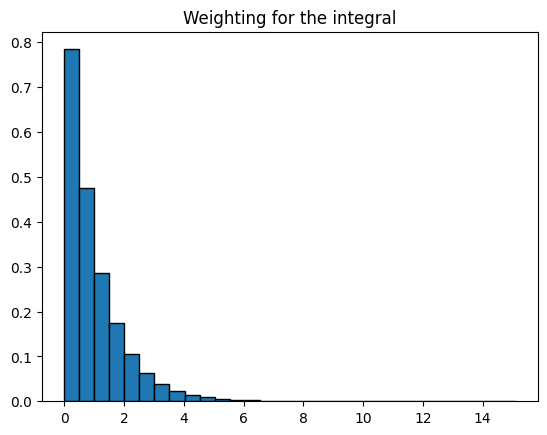

In [13]:
np.random.seed(0)
N = 10**6

uni = np.random.rand(N)
rnd = np.log(1/(1-uni))
plt.title('Weighting for the integral')
_ = plt.hist(rnd, bins=30, ec='black', density=True)

In [19]:
b = 4 # "infinity"
a = 0

integral_estimate = (b-a)/N * np.sum(np.exp(-rnd*np.cos(1/rnd)**2)/np.exp(-rnd))
print(f'Estimated value for the integral: {integral_estimate:.4f}')#
sigma_g = np.std(np.exp(-rnd*np.cos(1/rnd)**2)/np.exp(-rnd) ,ddof=1)
error = sigma_g/np.sqrt(N)
print(f'Error: {error:.4f}')

Estimated value for the integral: 6.0511
Error: 0.0004
